In [1]:
import numpy as np
import scipy as sc
import matplotlib.pylab as plt 

## Simulacion de un gas ideal en una caja adiabatica-Distribucion de Maxwell-Boltzmann
por:
- Miguel Sabogal
- Hugo Torres
- Mauricio Bandera
- Juan Gallardo

In [57]:
def Distribucion(i,f,N,vmax,m0,n,radio,tmax): #variables del sistema
    
    #CONDICIONES INICIALES
    inbox=[i,f] #caja con limites i= pared incial , f=pared final 
    pos=np.linspace(inbox[0]+radio,inbox[1]-radio,N) 
    """N posiciones iniciales van desde la pared inferio
       mas el radio de las particulas, hasta la pared final 
       menos el radio de las particulas, con el fin de que 
       existan N particiones para las posiciones sin tomar  
       las posiciones de la pared"""
    
    v0=np.array([vmax*np.random.uniform(-1,1) for i in range(N)])
    
    """Velocidades aleatorias entre -Vmax hasta Vmax"""
    
    m=np.array([m0 for i in range(N)]) 
    
    """Masas uniformes de las N particulas, m0= masa estandar"""
    
    for i in range(n):                                              
        m[np.random.randint(N-1)]= m0*(1 + np.random.uniform(-0.5,1)) 
    """Cambia la masa de una particula de forma
       aleatoria, variando su masa de entre 0.5
       veces su masa hasta el doble de ella"""    
        
    # Evolucion del sistema  
    
    dt=0.1                  #avance del tiempo especifico  
    t=0                     #contador para el numero de iteracciones 
    x=np.copy(pos)          #Copia de las posiciones iniciales 
    v=np.copy(v0)           #Copia de las velocidades iniciales
    
    while t<tmax:     
        """Avance del tiempo hasta tmax"""
     
        for i in range(N-1):  
            x[i]=x[i]+v[i]*dt
        """evolucion de las posiciones de las particulas en un dt=0.1, fijo"""
    
    
    #Codigo para las interacciones de la primera particula con la segunda y la pared.                
                
        if np.absolute(x[1]-x[0]) < 2*radio: #Se evalua si hubo contacto entre las dos primeras particulas
    
            v[0]=(  v[0]*(m[0]-m[1]) + 2*v[1]*m[1] )/(m[1]+m[0]) #Si lo hubo, se analiza el intercambio
            v[1]=(  v[1]*(m[1]-m[0]) + 2*v[0]*m[0] )/(m[1]+m[0]) #de momentum para cada partícula
            
            if v[1]>0 and v[0]<0: #evalua si las particulas se chocaron en direcciones contrarias
                c=np.absolute(x[1]-x[0])  
                #Cambia sus posiciones de manera que estas se encuentren en el momento posterior a la colision
                
                x[0]= x[0] -  np.absolute(2*radio-c)/2
                x[1]= x[1] +  np.absolute(2*radio-c)/2
            
            if v[1]>0 and v[0]>0:   #evalua si la primera golpeo a la segunda y cambia sus posiciones 
                c=np.absolute(x[1]-x[0])
                x[0]= x[0] 
                x[1]= x[1] +  np.absolute(2*radio-c)
                
            if v[1]<0 and v[0]<0:           #evalua si la segunda golpeo a la primera y cambia sus posiciones
                c=np.absolute(x[1]-x[0])
                x[0]= x[0] -  np.absolute(2*radio-c)
                x[1]= x[1]    
                
                
                
        if x[0]<=inbox[0]:         #si la primera particula sale de la caja, se simula que rebota con la pared
            x[0]= 2*inbox[0]-x[0]
            v[0]=-v[0]             #y cambia el sentido de la velocidad  
        
     #Codigo generico, para las interacciones entre particulas desde la numero 2 hasta la N-1.
     #teniendo en cuenta las posiciones de las variables (x,v,m) para cada particula en los arreglos
    
        for i in range(1,N-2):
            
            if np.absolute(x[i+1]-x[i]) < 2*radio: # Evalua si colisionaron la i y la i+1, vecina por la derecha 
                v[i]=(  v[i]*(m[i]-m[i+1]) + 2*v[i+1]*m[i+1] )/(m[i]+m[i+1])
                                                                            #intercambio de momentum
                v[i+1]=(  v[i+1]*(m[i+1]-m[i]) + 2*v[i]*m[i] )/(m[i]+m[i+1])
                
                if v[i+1]>0 and v[i]<0:   #De igual manera que para la particula 1 y 2, evalua la manera de la 
                                          #colision, y cambia sus posiciones para simular los choques"""
                    k=np.absolute(x[i+1]-x[i])
                    x[i]= x[i] -  np.absolute(2*radio-k)/2
                    x[i+1]= x[i+1] + np.absolute(2*radio-k)/2
            
                if v[i+1]>0 and v[i]>0:
                    k=np.absolute(x[i+1]-x[i])
                    x[i]= x[i]
                    x[i+1]= x[i+1] + np.absolute(2*radio-k)
                
                if v[i+1]<0 and v[i]<0:
                    k=np.absolute(x[i+1]-x[i])
                    x[i]= x[i]- np.absolute(2*radio-k)
                    x[i+1]= x[i+1] 
                
        
            if np.absolute(x[i]-x[i-1]) < 2*radio: #Evalua si colisionaron la i y la i-1, vecina por la izquierda
                
                v[i]=(  v[i]*(m[i]-m[i-1]) +2*v[i-1]*m[i-1] )/(m[i]+m[i-1])
                                                                           #Intercambio de momentum 
                v[i-1]=( v[i-1]*(m[i-1]-m[i]) +2*v[i]*m[i] )/(m[i]+m[i-1])
                k=np.absolute(x[i]-x[i-1])
                x[i-1]= x[i-1] -  np.absolute(2*radio-k)/2
                
                x[i]= x[i] + np.absolute(2*radio-k)/2
                
                                                   #evalua la manera de la colision y simula el choque
                if v[i]>0 and v[i-1]<0:
                    k=np.absolute(x[i]-x[i-1])
                    x[i-1]= x[i-1] -  np.absolute(2*radio-k)/2
                    x[i]= x[i] + np.absolute(2*radio-k)/2
            
                if v[i]>0 and v[i-1]>0:
                    k=np.absolute(x[i]-x[i-1])
                    x[i-1]= x[i-1]
                    x[i]= x[i] + np.absolute(2*radio-k)
                
                if v[i]<0 and v[i-1]<0:
                    k=np.absolute(x[i]-x[i-1])
                    x[i-1]= x[i-1]- np.absolute(2*radio-k)
                    x[i]= x[i]
                
                 
   
      #Codigo para las interacciones de ultima particula, con la N-1 y con la pared.
    
        if np.absolute(x[N-2]-x[N-1]) < 2*radio:    #Evalua si colisionaron la particula N y la N-1
                v[N-2]=(  v[N-2]*(m[N-2]-m[N-1]) +2*v[N-1]*m[N-1] )/(m[N-2]+m[N-1])
                                                                                   #intercambio de momentum
                v[N-1]=( v[N-1]*(m[N-1]-m[N-2]) +2*v[N-2]*m[N-2] )/(m[N-2]+m[N-1])
                
                if v[N-1]>0 and v[N-2]<0:           #las posibles formas de las colisiones 
                    k=np.absolute(x[N-1]-x[N-2])
                    x[N-2]= x[N-2] -  np.absolute(2*radio-k)/2
                    x[N-1]= x[N-1] + np.absolute(2*radio-k)/2
            
                if v[N-1]>0 and v[N-2]>0:
                    k=np.absolute(x[N-1]-x[N-2])
                    x[N-2]= x[N-2]
                    x[N-1]= x[N-1] + np.absolute(2*radio-k)
                
                if v[N-1]<0 and v[N-2]<0:
                    k=np.absolute(x[N-1]-x[N-2])
                    x[N-2]= x[N-2]- np.absolute(2*radio-k)
                    x[N-1]= x[N-1]
                
        
        if x[N-1]>=inbox[1]: #si la ultima partícula sale de la caja, se simula que rebota con la pared
            x[N-1]= 2*inbox[1]-x[N-1]
            v[N-1]= -v[N-1]  #y cambia el sentido de la velocidad     
        
        
        t=t+1 #Contador para el numero de iteracciones 
        
        
#parte anexa        
    afI=0
    afD=0
    posiI=[]
    posiD=[]
    for i in range(N):
        if x[i] > inbox[1]:
            afD= afD + 1
            posiD=np.hstack((posiD,i))
        if x[i] < inbox[0]:
            afI = afI + 1
            posiI=np.hstack((posiI,i))
   #Calcula la energia cinetica total inicial y final de las particulas.   

    energiafinal=0.5*m0*sum([(v[i]**2) for i in range(N)])
    #Como la masa es la misma para la gran mayoria de particulas, se deja afuera de la sumatoria
    energiainicial=0.5*m0*sum([(v0[i]**2) for i in range(N)])

    return v,x,v0,pos,energiainicial,energiafinal,afI,afD,posiI,posiD

Text(0.5,1,'Distribuciones de Maxwell-Boltzmann')

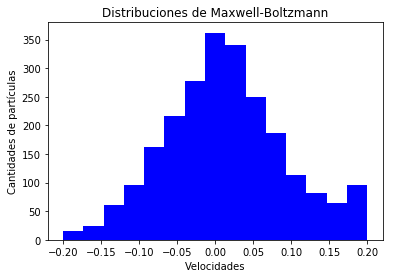

In [80]:
#Saca el promedio de los histogramas de las distribuciones de velocidades, l veces.  
j=0
l=150
for i in range(l): 
    j= j + plt.hist(Distribucion(1,701,1000,0.2,0.8,3,0.15,600)[0],15,(-0.2,0.2),color="b")[0]
to= j/l
to
plt.xlabel('Velocidades')
plt.ylabel('Cantidades de partículas')
plt.title('Distribuciones de Maxwell-Boltzmann')